---
**Carga de Librerías y de Datos**
---
---

In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random

# import tensorflow as tf
# from tensorflow import keras
# from tensorflow.keras import layers

In [46]:
datos_salarios = pd.read_csv("D:/Users/Usuario/Documents/Universidad/Machine Learning/6- Tercera Consigna/RepoEntregaTresMachine-main/adult.csv",
                              usecols=['age', 'workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 
                                       'sex', 'hours.per.week', 'native.country', 'income'],
                              delimiter= ",", decimal= ".")

In [47]:
datos_salarios.rename(columns={  "education.num"     : "education_num",
                        "marital.status"    : "marital_status",
                        "capital.gain"      : "capital_gain",
                        "capital.loss"      : "capital_loss",
                        "hours.per.week"    : "hours_per_week",
                        "native.country"    : "native_country",
                    }, inplace=True)
datos_salarios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   education       32561 non-null  object
 3   marital_status  32561 non-null  object
 4   occupation      32561 non-null  object
 5   relationship    32561 non-null  object
 6   race            32561 non-null  object
 7   sex             32561 non-null  object
 8   hours_per_week  32561 non-null  int64 
 9   native_country  32561 non-null  object
 10  income          32561 non-null  object
dtypes: int64(2), object(9)
memory usage: 2.7+ MB


In [48]:
datos_salarios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   education       32561 non-null  object
 3   marital_status  32561 non-null  object
 4   occupation      32561 non-null  object
 5   relationship    32561 non-null  object
 6   race            32561 non-null  object
 7   sex             32561 non-null  object
 8   hours_per_week  32561 non-null  int64 
 9   native_country  32561 non-null  object
 10  income          32561 non-null  object
dtypes: int64(2), object(9)
memory usage: 2.7+ MB


---
---
**Limpieza y Exploración de Datos**
---
---
---

In [49]:
colores = ["greenyellow", "cyan", "r", "gold", "mediumpurple", "darkblue", "hotpink", "saddlebrown", "darkgreen"]

**1) Revisión de NAs, NULL y duplicados**

In [50]:
datos_salarios.isna().sum()

age               0
workclass         0
education         0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [51]:
datos_salarios.isnull().sum()

age               0
workclass         0
education         0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
hours_per_week    0
native_country    0
income            0
dtype: int64

**2) Revisión Tipo de Datos**

In [52]:
print(datos_salarios.dtypes)

age                int64
workclass         object
education         object
marital_status    object
occupation        object
relationship      object
race              object
sex               object
hours_per_week     int64
native_country    object
income            object
dtype: object


---
***Variable AGE***

---

Text(0.5, 1.0, 'Histograma de edades')

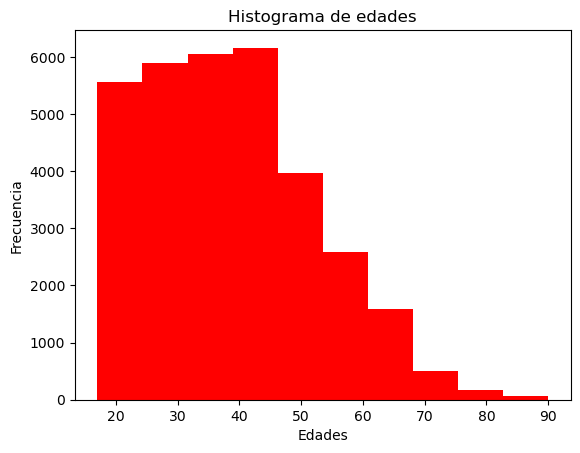

In [53]:
color_age = random.choice(colores)

plt.hist(data= datos_salarios, x= "age", color=color_age)

plt.xlabel('Edades')
plt.ylabel('Frecuencia')
plt.title('Histograma de edades')

<Axes: >

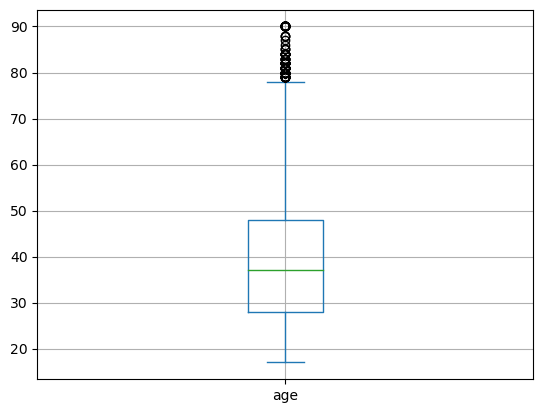

In [54]:
datos_salarios["age"].plot.box( grid = "true")

***

In [55]:
Q1_edad = np.quantile(datos_salarios.age, 0.25)
Q3_edad = np.quantile(datos_salarios.age, 0.75)

i_q_R_edad = Q3_edad - Q1_edad

vth_sup_edad = Q3_edad + (1.5 * i_q_R_edad)

#---

datos_salarios_outlier = datos_salarios.loc[datos_salarios.age > vth_sup_edad, :]
len(datos_salarios_outlier)

143

In [56]:
vth_sup_edad

78.0

In [57]:
100 * len(datos_salarios_outlier) / len(datos_salarios)

0.4391757009919843

In [58]:
datos_salarios.drop(datos_salarios.loc[datos_salarios['age'] >= vth_sup_edad].index, inplace=True)

Text(0.5, 1.0, 'Histograma de edades')

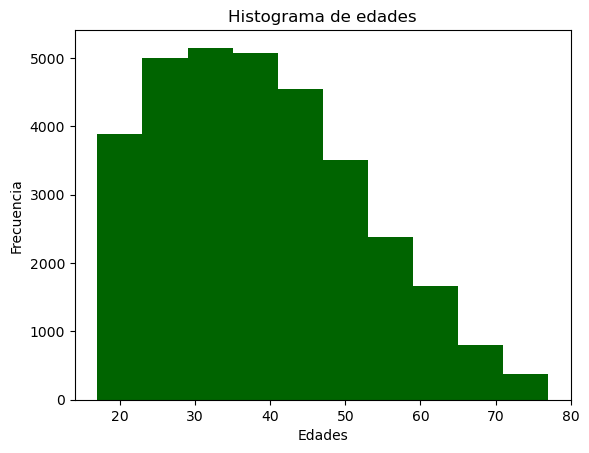

In [59]:
color_age = random.choice(colores)

plt.hist(data= datos_salarios, x= "age", color=color_age)

plt.xlabel('Edades')
plt.ylabel('Frecuencia')
plt.title('Histograma de edades')

<Axes: >

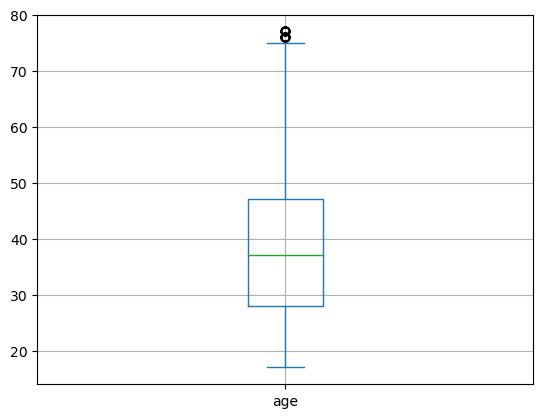

In [60]:
datos_salarios["age"].plot.box( grid = "true")

In [61]:
datos_salarios_outlier = datos_salarios.loc[datos_salarios.age > vth_sup_edad, :]
len(datos_salarios_outlier)

0

---
***Variable WORKCLASS***

---

In [62]:
datos_salarios["workclass"].value_counts()

Private             22628
Self-emp-not-inc     2514
Local-gov            2083
?                    1792
State-gov            1297
Self-emp-inc         1102
Federal-gov           958
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

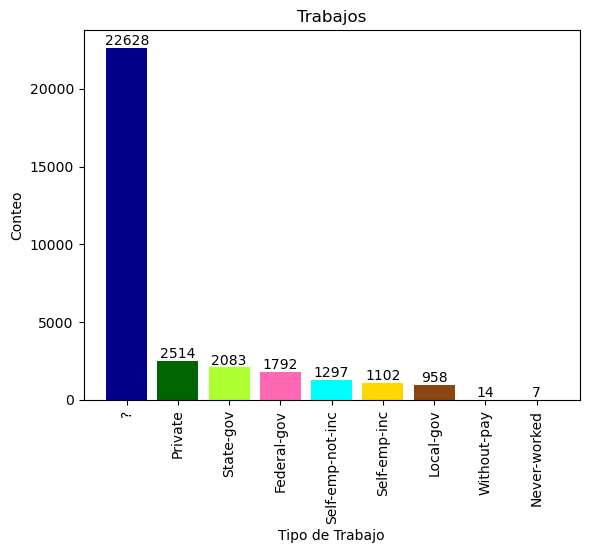

In [63]:
random.shuffle(colores)

tipo_trabajo = datos_salarios["workclass"].unique()
conteo_trabajos = datos_salarios["workclass"].value_counts()

plt.bar(tipo_trabajo, conteo_trabajos, color = colores)

for contador1 in range(len(tipo_trabajo)):
    plt.text(tipo_trabajo[contador1], conteo_trabajos[contador1]+0.1, conteo_trabajos[contador1], ha='center', va='bottom')

plt.xticks(rotation=90)

plt.title('Trabajos')
plt.xlabel('Tipo de Trabajo')
plt.ylabel('Conteo')

plt.show()

In [64]:
datos_salarios.drop(datos_salarios.loc[datos_salarios['workclass'] == '?'].index,inplace=True)

In [65]:
datos_salarios["workclass"].value_counts()

Private             22628
Self-emp-not-inc     2514
Local-gov            2083
State-gov            1297
Self-emp-inc         1102
Federal-gov           958
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

---
***Variable EDUCATION***

---

In [66]:
datos_salarios["education"].value_counts()

HS-grad         9932
Some-college    6762
Bachelors       5163
Masters         1666
Assoc-voc       1318
11th            1052
Assoc-acdm      1019
10th             830
7th-8th          560
Prof-school      554
9th              461
Doctorate        394
12th             392
5th-6th          301
1st-4th          153
Preschool         46
Name: education, dtype: int64

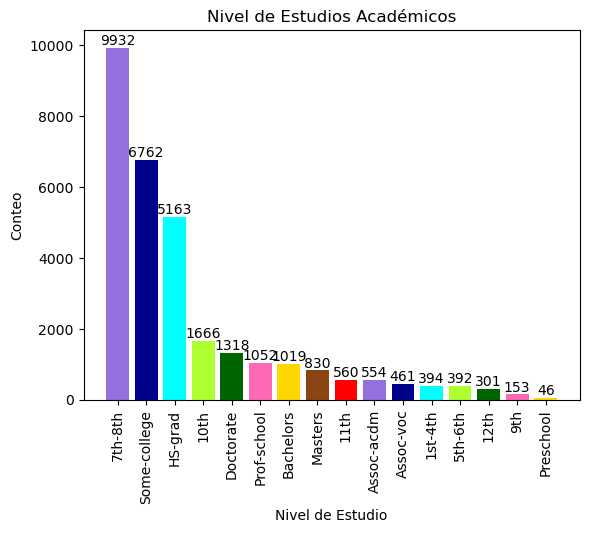

In [67]:
random.shuffle(colores)

nivel_educación = datos_salarios["education"].unique()
conteo_educación = datos_salarios["education"].value_counts()

plt.bar(nivel_educación, conteo_educación, color = colores)

for contador2 in range(len(nivel_educación)):
    plt.text(nivel_educación[contador2], conteo_educación[contador2]+0.1, conteo_educación[contador2], ha='center', va='bottom')

plt.xticks(rotation=90)

plt.title('Nivel de Estudios Académicos')
plt.xlabel('Nivel de Estudio')
plt.ylabel('Conteo')

plt.show()

---
***Variable EDUCATION-NUMBER***

---

In [68]:
"""
color_eduNum = random.choice(colores)

plt.hist(data= datos_salarios, x= "education-num", color=color_eduNum)

plt.title('Histograma de Grados Académicos Alcanzados')
plt.ylabel('Frecuencia')
plt.xlabel('Grado Académicos')
"""

'\ncolor_eduNum = random.choice(colores)\n\nplt.hist(data= datos_salarios, x= "education-num", color=color_eduNum)\n\nplt.title(\'Histograma de Grados Académicos Alcanzados\')\nplt.ylabel(\'Frecuencia\')\nplt.xlabel(\'Grado Académicos\')\n'

In [69]:
"""
datos_salarios["education-num"].plot.box()
"""

'\ndatos_salarios["education-num"].plot.box()\n'

---
***Variable MARITAL-ESTATUS***

---

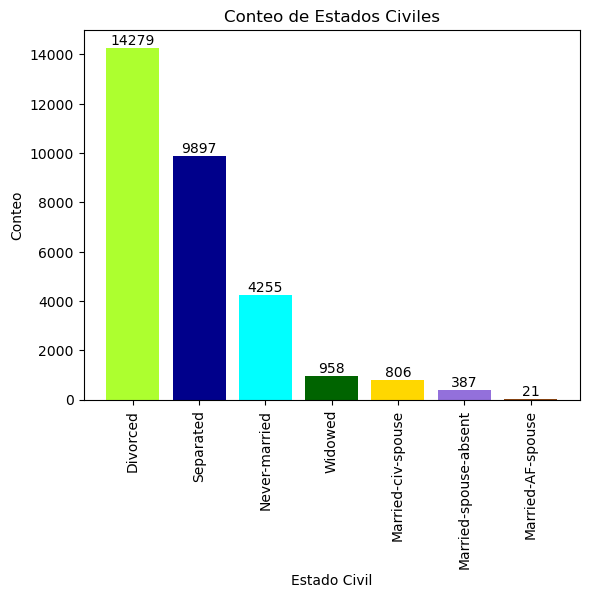

In [70]:
random.shuffle(colores)

estado_civil = datos_salarios["marital_status"].unique()
conteo_estadoCivil = datos_salarios["marital_status"].value_counts()

plt.bar(estado_civil, conteo_estadoCivil, color = colores)

for contador3 in range(len(estado_civil)):
    plt.text(estado_civil[contador3], conteo_estadoCivil[contador3]+0.1, conteo_estadoCivil[contador3], ha='center', va='bottom')

plt.xticks(rotation=90)

plt.title('Conteo de Estados Civiles')
plt.xlabel('Estado Civil')
plt.ylabel('Conteo')

plt.show()

---
***Variable OCCUPATION***

---

In [71]:
datos_salarios["occupation"].value_counts()

Prof-specialty       4120
Craft-repair         4092
Exec-managerial      4039
Adm-clerical         3758
Sales                3633
Other-service        3281
Machine-op-inspct    1998
Transport-moving     1594
Handlers-cleaners    1367
Farming-fishing       983
Tech-support          928
Protective-serv       647
Priv-house-serv       147
Armed-Forces            9
?                       7
Name: occupation, dtype: int64

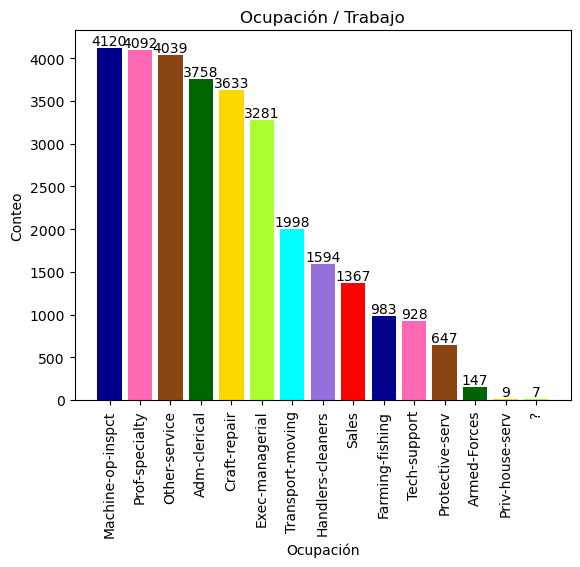

In [72]:
random.shuffle(colores)

ocupacion = datos_salarios["occupation"].unique()
conteo_ocupacion = datos_salarios["occupation"].value_counts()

plt.bar(ocupacion, conteo_ocupacion, color = colores)

for contador4 in range(len(ocupacion)):
    plt.text(ocupacion[contador4], conteo_ocupacion[contador4]+0.1, conteo_ocupacion[contador4], ha='center', va='bottom')

plt.xticks(rotation=90)

plt.title('Ocupación / Trabajo')
plt.xlabel('Ocupación')
plt.ylabel('Conteo')

plt.show()

In [73]:
datos_salarios.drop(datos_salarios.loc[datos_salarios['occupation'] == '?'].index,inplace=True)

In [74]:
datos_salarios["occupation"].value_counts()

Prof-specialty       4120
Craft-repair         4092
Exec-managerial      4039
Adm-clerical         3758
Sales                3633
Other-service        3281
Machine-op-inspct    1998
Transport-moving     1594
Handlers-cleaners    1367
Farming-fishing       983
Tech-support          928
Protective-serv       647
Priv-house-serv       147
Armed-Forces            9
Name: occupation, dtype: int64

---
***Variable RELATIONSHIP***

---

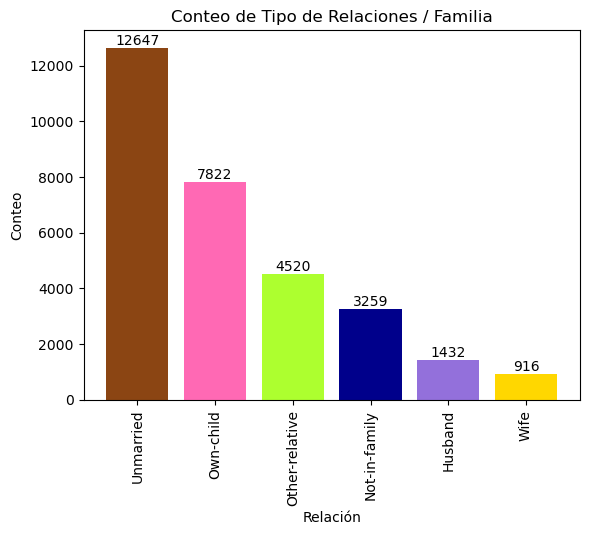

In [75]:
random.shuffle(colores)

relacion = datos_salarios["relationship"].unique()
conteo_relacion = datos_salarios["relationship"].value_counts()

plt.bar(relacion, conteo_relacion, color = colores)

for contador5 in range(len(relacion)):
    plt.text(relacion[contador5], conteo_relacion[contador5]+0.1, conteo_relacion[contador5], ha='center', va='bottom')

plt.xticks(rotation=90)

plt.title('Conteo de Tipo de Relaciones / Familia')
plt.xlabel('Relación')
plt.ylabel('Conteo')

plt.show()

---
***Variable RACE***

---

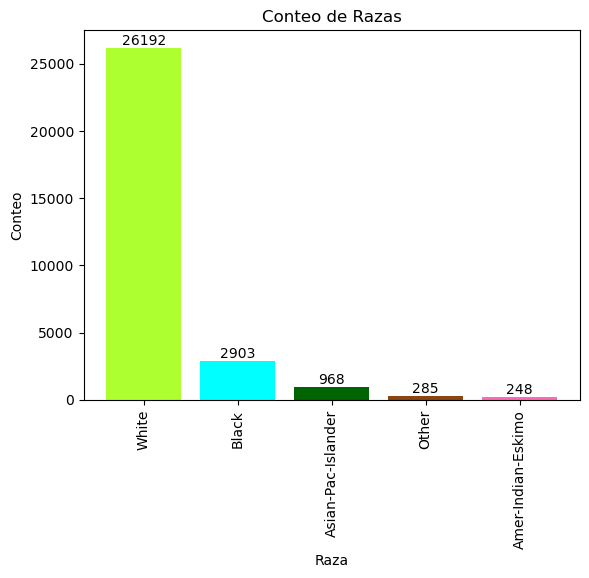

In [76]:
random.shuffle(colores)

raza = datos_salarios["race"].unique()
conteo_raza = datos_salarios["race"].value_counts()

plt.bar(raza, conteo_raza, color = colores)

for contador6 in range(len(raza)):
    plt.text(raza[contador6], conteo_raza[contador6]+0.1, conteo_raza[contador6], ha='center', va='bottom')

plt.xticks(rotation=90)

plt.title('Conteo de Razas')
plt.xlabel('Raza')
plt.ylabel('Conteo')

plt.show()

---
***Variable SEX***

---

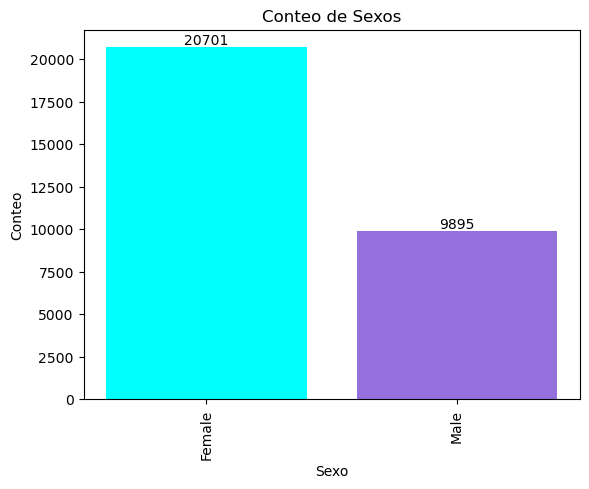

In [77]:
random.shuffle(colores)

sexo = datos_salarios["sex"].unique()
conteo_sexo = datos_salarios["sex"].value_counts()

plt.bar(sexo, conteo_sexo, color = colores)

for contador7 in range(len(sexo)):
    plt.text(sexo[contador7], conteo_sexo[contador7]+0.1, conteo_sexo[contador7], ha='center', va='bottom')

plt.xticks(rotation=90)

plt.title('Conteo de Sexos')
plt.xlabel('Sexo')
plt.ylabel('Conteo')

plt.show()

---
***Variable HOURS-PER-WEEK***

---

Text(0.5, 0, 'Horas de Trabajo')

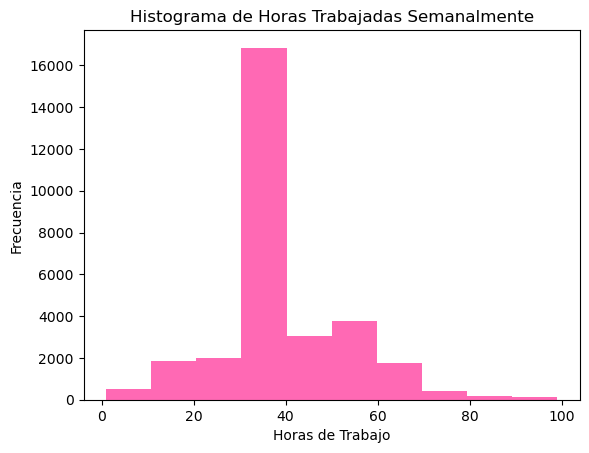

In [78]:
color_hourPERweek = random.choice(colores)

plt.hist(data= datos_salarios, x= "hours_per_week", color=color_hourPERweek)

plt.title('Histograma de Horas Trabajadas Semanalmente')
plt.ylabel('Frecuencia')
plt.xlabel('Horas de Trabajo')

<Axes: >

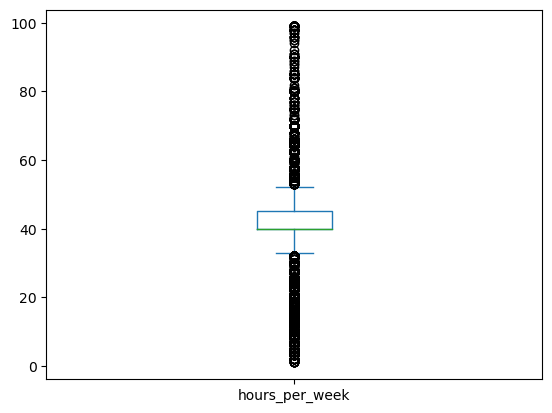

In [79]:
datos_salarios["hours_per_week"].plot.box()

---
***Variable NATIVE-COUNTRY***

---

In [80]:
datos_salarios["native_country"].value_counts()

United-States                 27396
Mexico                          609
?                               554
Philippines                     187
Germany                         128
Puerto-Rico                     108
Canada                          107
India                           100
El-Salvador                      99
Cuba                             91
England                          85
Jamaica                          80
South                            70
China                            68
Italy                            68
Dominican-Republic               66
Vietnam                          64
Guatemala                        63
Japan                            59
Columbia                         56
Poland                           54
Haiti                            42
Iran                             42
Taiwan                           42
Portugal                         34
Nicaragua                        33
Peru                             30
Greece                      

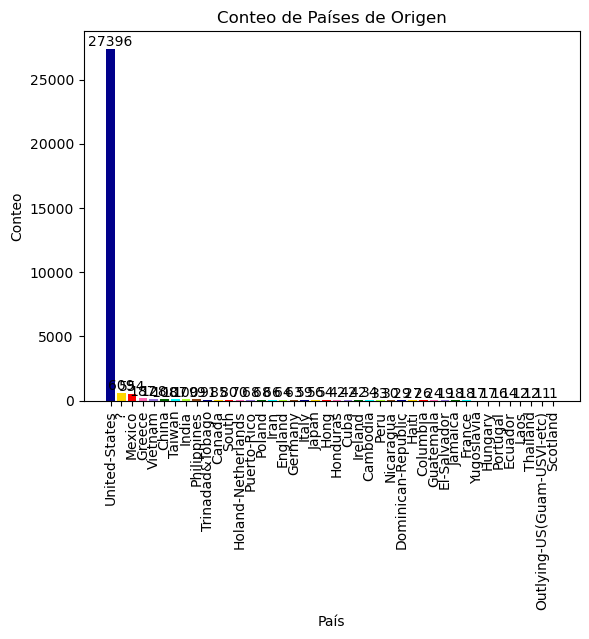

In [81]:
random.shuffle(colores)

pais_nativo = datos_salarios["native_country"].unique()
conteo_pais = datos_salarios["native_country"].value_counts()

plt.bar(pais_nativo, conteo_pais, color = colores)

for contador8 in range(len(pais_nativo)):
    plt.text(pais_nativo[contador8], conteo_pais[contador8]+0.1, conteo_pais[contador8], ha='center', va='bottom')

plt.xticks(rotation=90)

plt.title('Conteo de Países de Origen')
plt.xlabel('País')
plt.ylabel('Conteo')

plt.show()

In [82]:
datos_salarios["native_country"].value_counts()

United-States                 27396
Mexico                          609
?                               554
Philippines                     187
Germany                         128
Puerto-Rico                     108
Canada                          107
India                           100
El-Salvador                      99
Cuba                             91
England                          85
Jamaica                          80
South                            70
China                            68
Italy                            68
Dominican-Republic               66
Vietnam                          64
Guatemala                        63
Japan                            59
Columbia                         56
Poland                           54
Haiti                            42
Iran                             42
Taiwan                           42
Portugal                         34
Nicaragua                        33
Peru                             30
Greece                      

In [83]:
datos_salarios.drop(datos_salarios.loc[datos_salarios['native_country'] == '?'].index,inplace=True)

---
***Variable SALARY***

---

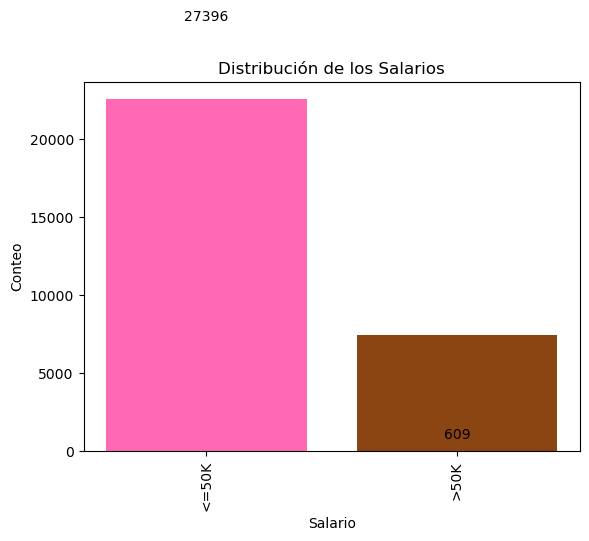

In [84]:
random.shuffle(colores)

nivel_salario = datos_salarios["income"].unique()
conteo_salario = datos_salarios["income"].value_counts()

plt.bar(nivel_salario, conteo_salario, color = colores)

for contador9 in range(len(nivel_salario)):
    plt.text(nivel_salario[contador9], conteo_pais[contador9]+0.1, conteo_pais[contador9], ha='center', va='bottom')

plt.xticks(rotation=90)

plt.title('Distribución de los Salarios')
plt.xlabel('Salario')
plt.ylabel('Conteo')

plt.show()

---
***Relación Variables***

---

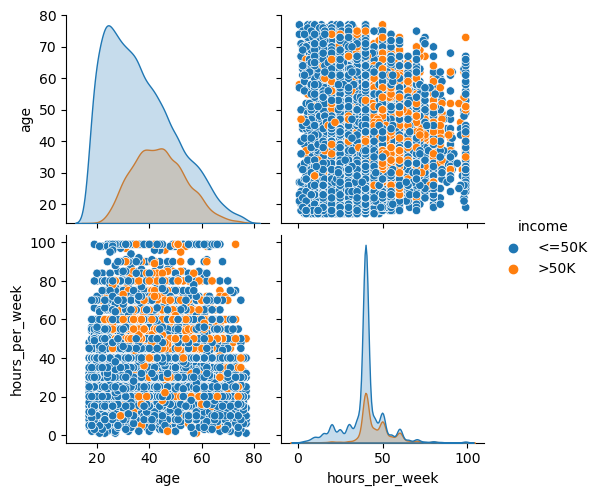

In [85]:
sns.pairplot(datos_salarios, hue="income")

In [86]:
datos_salarios.to_csv("dataset_salariosLimpio.csv", index=False)

---
---
---
---
---
**EDA**
---
---
---
---
---
---

In [113]:
colores_positivoNegativo = ["red", "blue"]

colores_Educacion = ["#FF0000", "#00BFBF", "#00FFFF", "#8A2BE2", "#FF8C00", "#800080"]

Lista de variables disponibles:

* age
* workclass
* education
* marital_status
* occupation
* relationship
* race
* sex
* hours_per_week
* native_country
* income

---
**Salario con Tipo de Trabajo**

---

[Text(0, 0, 'Private'),
 Text(1, 0, 'State-gov'),
 Text(2, 0, 'Federal-gov'),
 Text(3, 0, 'Self-emp-not-inc'),
 Text(4, 0, 'Self-emp-inc'),
 Text(5, 0, 'Local-gov'),
 Text(6, 0, 'Without-pay')]

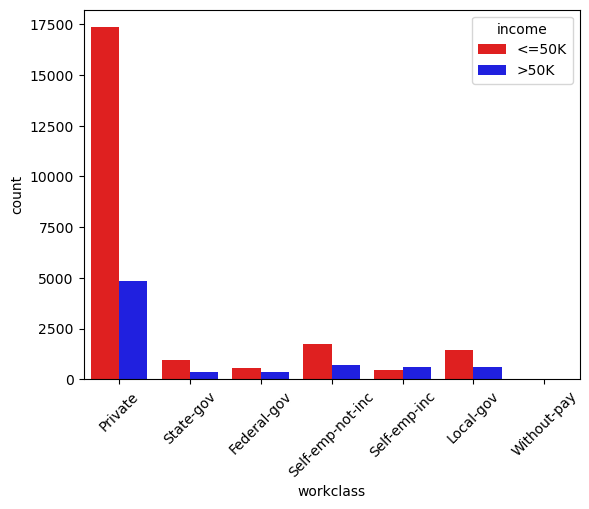

In [111]:
grafica_salarioTipoTrabajo = sns.countplot(data = datos_salarios, x='workclass', hue="income", palette=colores_positivoNegativo)
grafica_salarioTipoTrabajo.set_xticklabels(grafica_salarioTipoTrabajo.get_xticklabels(), rotation=45)

---
**Salario con Educación**

---

[Text(0, 0, '7th-8th'),
 Text(1, 0, 'Some-college'),
 Text(2, 0, 'HS-grad'),
 Text(3, 0, '10th'),
 Text(4, 0, 'Doctorate'),
 Text(5, 0, 'Prof-school'),
 Text(6, 0, 'Bachelors'),
 Text(7, 0, 'Masters'),
 Text(8, 0, '11th'),
 Text(9, 0, 'Assoc-voc'),
 Text(10, 0, '1st-4th'),
 Text(11, 0, '5th-6th'),
 Text(12, 0, 'Assoc-acdm'),
 Text(13, 0, '12th'),
 Text(14, 0, '9th'),
 Text(15, 0, 'Preschool')]

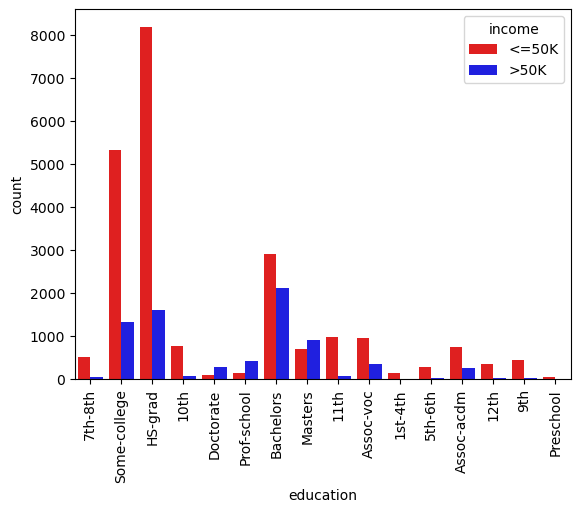

In [124]:
grafica_salarioEducacion = sns.countplot(data = datos_salarios, x='education', hue="income", palette=colores_positivoNegativo)
grafica_salarioEducacion.set_xticklabels(grafica_salarioEducacion.get_xticklabels(), rotation=90)

---
**Salario con Estado Civil**

---

[Text(0, 0, 'Divorced'),
 Text(1, 0, 'Separated'),
 Text(2, 0, 'Never-married'),
 Text(3, 0, 'Widowed'),
 Text(4, 0, 'Married-civ-spouse'),
 Text(5, 0, 'Married-spouse-absent'),
 Text(6, 0, 'Married-AF-spouse')]

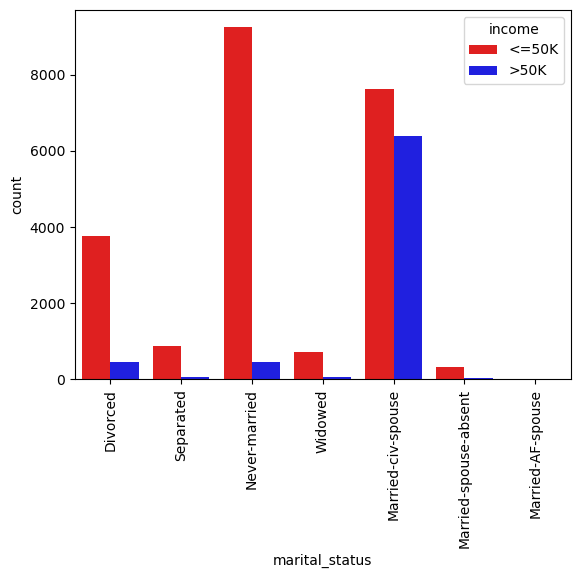

In [127]:
grafica_salarioEducacion = sns.countplot(data = datos_salarios, x='marital_status', hue="income", palette=colores_positivoNegativo)
grafica_salarioEducacion.set_xticklabels(grafica_salarioEducacion.get_xticklabels(), rotation=90)

---
**Salario con Ocupación**

---

[Text(0, 0, 'Machine-op-inspct'),
 Text(1, 0, 'Prof-specialty'),
 Text(2, 0, 'Other-service'),
 Text(3, 0, 'Adm-clerical'),
 Text(4, 0, 'Exec-managerial'),
 Text(5, 0, 'Transport-moving'),
 Text(6, 0, 'Sales'),
 Text(7, 0, 'Craft-repair'),
 Text(8, 0, 'Farming-fishing'),
 Text(9, 0, 'Tech-support'),
 Text(10, 0, 'Protective-serv'),
 Text(11, 0, 'Handlers-cleaners'),
 Text(12, 0, 'Armed-Forces'),
 Text(13, 0, 'Priv-house-serv')]

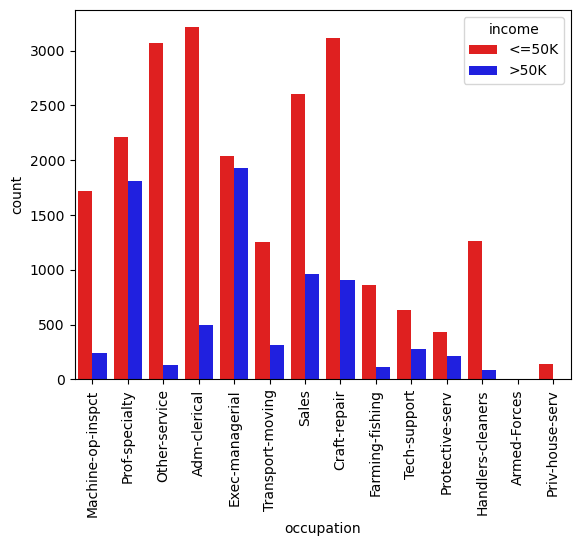

In [128]:
grafica_salarioEducacion = sns.countplot(data = datos_salarios, x='occupation', hue="income", palette=colores_positivoNegativo)
grafica_salarioEducacion.set_xticklabels(grafica_salarioEducacion.get_xticklabels(), rotation=90)

---
**Salario con Relaciones / Familia**

---

[Text(0, 0, 'Unmarried'),
 Text(1, 0, 'Own-child'),
 Text(2, 0, 'Other-relative'),
 Text(3, 0, 'Not-in-family'),
 Text(4, 0, 'Husband'),
 Text(5, 0, 'Wife')]

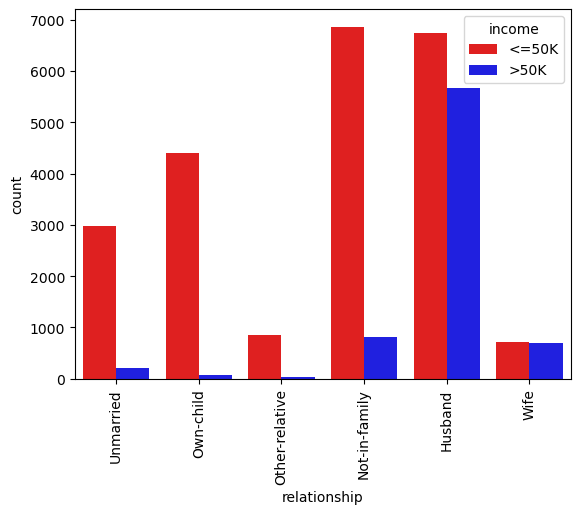

In [130]:
grafica_salarioEducacion = sns.countplot(data = datos_salarios, x='relationship', hue="income", palette=colores_positivoNegativo)
grafica_salarioEducacion.set_xticklabels(grafica_salarioEducacion.get_xticklabels(), rotation=90)

---
**Salario con Raza**

---

[Text(0, 0, 'White'),
 Text(1, 0, 'Black'),
 Text(2, 0, 'Asian-Pac-Islander'),
 Text(3, 0, 'Other'),
 Text(4, 0, 'Amer-Indian-Eskimo')]

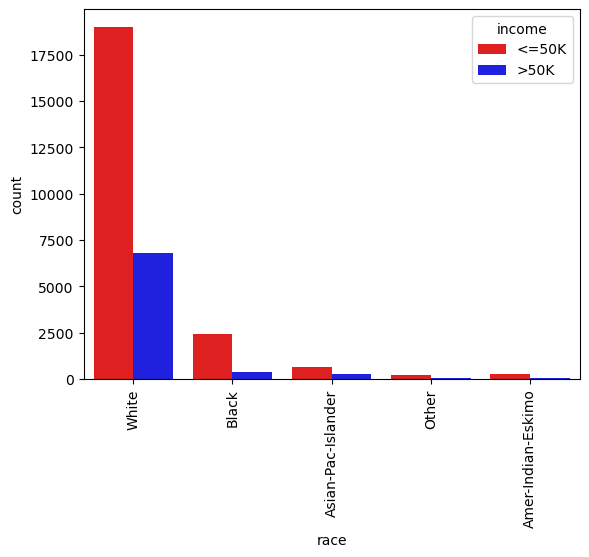

In [131]:
grafica_salarioEducacion = sns.countplot(data = datos_salarios, x='race', hue="income", palette=colores_positivoNegativo)
grafica_salarioEducacion.set_xticklabels(grafica_salarioEducacion.get_xticklabels(), rotation=90)

---
**Salario con Sexo**

---

[Text(0, 0, 'Female'), Text(1, 0, 'Male')]

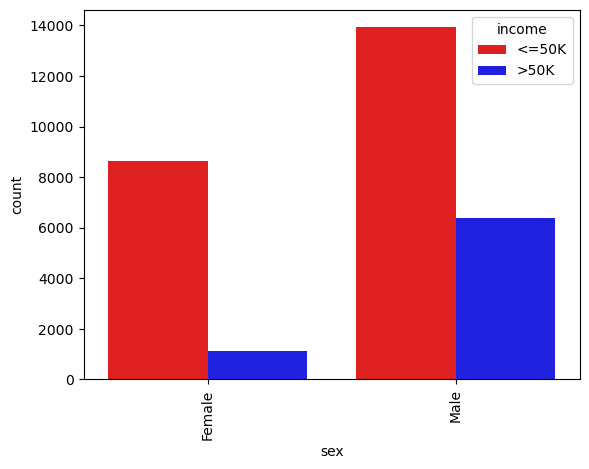

In [132]:
grafica_salarioEducacion = sns.countplot(data = datos_salarios, x='sex', hue="income", palette=colores_positivoNegativo)
grafica_salarioEducacion.set_xticklabels(grafica_salarioEducacion.get_xticklabels(), rotation=90)

---
**Salario con País de Origen**

---

[Text(0, 0, 'United-States'),
 Text(1, 0, 'Mexico'),
 Text(2, 0, 'Greece'),
 Text(3, 0, 'Vietnam'),
 Text(4, 0, 'China'),
 Text(5, 0, 'Taiwan'),
 Text(6, 0, 'India'),
 Text(7, 0, 'Philippines'),
 Text(8, 0, 'Trinadad&Tobago'),
 Text(9, 0, 'Canada'),
 Text(10, 0, 'South'),
 Text(11, 0, 'Holand-Netherlands'),
 Text(12, 0, 'Puerto-Rico'),
 Text(13, 0, 'Poland'),
 Text(14, 0, 'Iran'),
 Text(15, 0, 'England'),
 Text(16, 0, 'Germany'),
 Text(17, 0, 'Italy'),
 Text(18, 0, 'Japan'),
 Text(19, 0, 'Hong'),
 Text(20, 0, 'Honduras'),
 Text(21, 0, 'Cuba'),
 Text(22, 0, 'Ireland'),
 Text(23, 0, 'Cambodia'),
 Text(24, 0, 'Peru'),
 Text(25, 0, 'Nicaragua'),
 Text(26, 0, 'Dominican-Republic'),
 Text(27, 0, 'Haiti'),
 Text(28, 0, 'Columbia'),
 Text(29, 0, 'Guatemala'),
 Text(30, 0, 'El-Salvador'),
 Text(31, 0, 'Jamaica'),
 Text(32, 0, 'France'),
 Text(33, 0, 'Yugoslavia'),
 Text(34, 0, 'Hungary'),
 Text(35, 0, 'Portugal'),
 Text(36, 0, 'Ecuador'),
 Text(37, 0, 'Laos'),
 Text(38, 0, 'Thailand'),
 Text(39

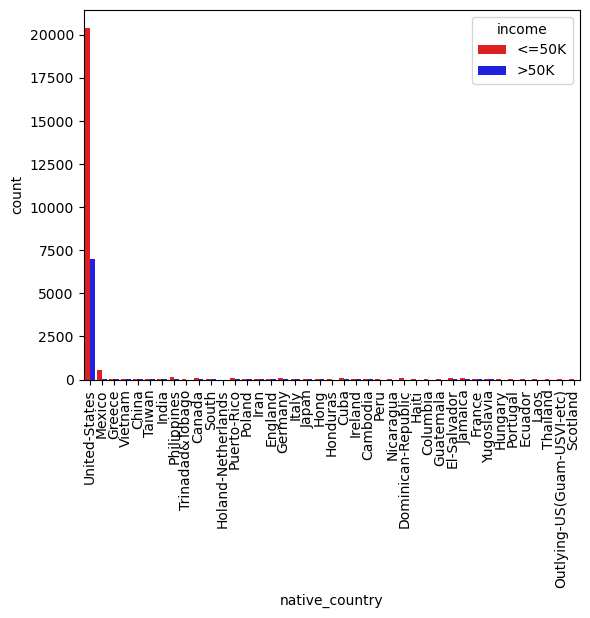

In [133]:
grafica_salarioEducacion = sns.countplot(data = datos_salarios, x='native_country', hue="income", palette=colores_positivoNegativo)
grafica_salarioEducacion.set_xticklabels(grafica_salarioEducacion.get_xticklabels(), rotation=90)